In [2]:
from huggingface_hub import login
from diffusers import DiffusionPipeline, StableDiffusionPipeline
import torch

# login()

pipeline = StableDiffusionPipeline.from_single_file(
    "/media/user/AI Models/Stable-Diffusion/ckpt/epicphotogasm_lastUnicorn.safetensors", torch_dtype=torch.float16, use_safetensors=True, variant="fp16"
).to("cuda")

prompt = "A photograph of an astronaut riding a horse on Mars, high resolution, high definition."

`text_config_dict` is provided which will be used to initialize `CLIPTextConfig`. The value `text_config["id2label"]` will be overriden.
`text_config_dict` is provided which will be used to initialize `CLIPTextConfig`. The value `text_config["bos_token_id"]` will be overriden.
`text_config_dict` is provided which will be used to initialize `CLIPTextConfig`. The value `text_config["eos_token_id"]` will be overriden.
/home/user/Code/ai-experiments/py_api/venv/lib/python3.11/site-packages/transformers/models/clip/feature_extraction_clip.py:28: FutureWarning: The class CLIPFeatureExtractor is deprecated and will be removed in version 5 of Transformers. Please use CLIPImageProcessor instead.
  warnings.warn(


100%|██████████| 50/50 [00:06<00:00,  7.76it/s]


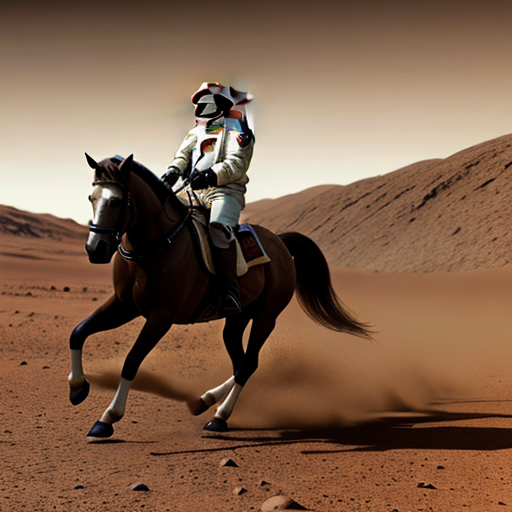

In [3]:
generator = torch.Generator(device="cuda").manual_seed(8)
image = pipeline(prompt, generator=generator).images[0]
image

100%|██████████| 50/50 [00:06<00:00,  8.10it/s]


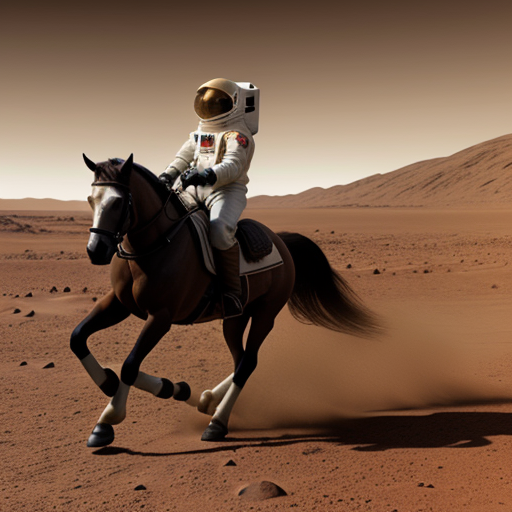

In [4]:
from diffusers import DDIMScheduler

pipeline.scheduler = DDIMScheduler.from_config(pipeline.scheduler.config)
generator = torch.Generator(device="cuda").manual_seed(8)
image = pipeline(prompt, generator=generator).images[0]
image